<a href="https://colab.research.google.com/github/manthra16695/Code-360/blob/main/Manipal_Hospitals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data=pd.read_csv('/content/sample_data/Manipal_Train.csv')

In [2]:
data.head()

,SN,HospitalNo2,MaritalStatus,AgeYrs,Sex,BedCategory,Department,Estimatedcost,InsPayorcategory,State,Country,STATEZONE,CE_ACCESSIBILITY,CE_CSAT,CE_VALUEFORMONEY,EM_IMMEDIATEATTENTION,EM_NURSING,EM_DOCTOR,EM_OVERALL,AD_TIME,AD_TARRIFFPACKAGESEXPLAINATION,AD_STAFFATTITUDE,INR_ROOMCLEANLINESS,INR_ROOMPEACE,INR_ROOMEQUIPMENT,INR_ROOMAMBIENCE,FNB_FOODQUALITY,FNB_FOODDELIVERYTIME,FNB_DIETICIAN,FNB_STAFFATTITUDE,AE_ATTENDEECARE,AE_PATIENTSTATUSINFO,AE_ATTENDEEFOOD,DOC_TREATMENTEXPLAINATION,DOC_ATTITUDE,DOC_VISITS,DOC_TREATMENTEFFECTIVENESS,NS_CALLBELLRESPONSE,NS_NURSESATTITUDE,NS_NURSEPROACTIVENESS,NS_NURSEPATIENCE,OVS_OVERALLSTAFFATTITUDE,OVS_OVERALLSTAFFPROMPTNESS,OVS_SECURITYATTITUDE,DP_DISCHARGETIME,DP_DISCHARGEQUERIES,DP_DISCHARGEPROCESS,AdmissionDate,DischargeDate,LengthofStay,CE_NPS,NPS_Status
0,1,35236,Single,4.0,F,SPECIAL,PEDIATRIC,25000.0,PATIENT,Karnataka,INDIA,SOUTH,4,4,4,4,4,4,4,4,4,4,4,4,4,4,2,4,2,4,4,4,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,7/18/2014,7/21/2014,3,9,Promotor
1,2,35237,Single,13.0,F,SPECIAL,PEDIATRIC,15000.0,PATIENT,Karnataka,INDIA,SOUTH,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,7/11/2014,7/16/2014,5,10,Promotor
2,3,35234,Married,33.0,F,SEMISPECIAL,GYNAEC,70000.0,EXEMPTION,Karnataka,INDIA,SOUTH,3,2,2,4,4,4,4,3,3,4,3,3,3,3,2,3,3,4,4,4,3,4,4,4,4,4,4,4,4,4,4,4,3,4,3,6/17/2014,7/20/2014,33,7,Passive
3,4,35232,Married,51.0,F,SPECIAL,GYNAEC,150000.0,PATIENT,West Bengal,INDIA,EAST,4,4,3,4,4,4,4,4,4,4,3,4,4,3,3,4,4,4,3,4,3,4,4,4,4,4,4,3,4,4,3,3,3,4,3,7/16/2014,7/22/2014,6,10,Promotor
4,5,35233,Married,31.0,F,SPECIAL,GYNAEC,100000.0,INSURANCE,Karnataka,INDIA,SOUTH,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,7/13/2014,7/16/2014,3,10,Promotor


In [ ]:
data.isnull().sum()

SN                                0
HospitalNo2                       0
MaritalStatus                     0
AgeYrs                            0
Sex                               0
BedCategory                       0
Department                        0
Estimatedcost                     0
InsPayorcategory                  0
State                             0
Country                           0
STATEZONE                         0
CE_ACCESSIBILITY                  0
CE_CSAT                           0
CE_VALUEFORMONEY                  0
EM_IMMEDIATEATTENTION             0
EM_NURSING                        0
EM_DOCTOR                         0
EM_OVERALL                        0
AD_TIME                           0
AD_TARRIFFPACKAGESEXPLAINATION    0
AD_STAFFATTITUDE                  0
INR_ROOMCLEANLINESS               0
INR_ROOMPEACE                     0
INR_ROOMEQUIPMENT                 0
INR_ROOMAMBIENCE                  0
FNB_FOODQUALITY                   0
FNB_FOODDELIVERYTIME        

In [3]:
data=data.drop(['SN','HospitalNo2'],axis=1)


In [4]:
catlist=['MaritalStatus','Sex','BedCategory','Department','InsPayorcategory','State','Country','STATEZONE']
numlist=['AgeYrs','Estimatedcost','LengthofStay','CE_NPS']

for i in numlist:
  data[i]=data[i].astype('int')




In [5]:
##To Segregate Numeric and Categorical variables
ls=list(data.columns.values)

for i in ls:
  if i in numlist:
    ls.remove(i)

In [6]:
for i in ls:
  data[i]=data[i].astype('object')
# data['MaritalStatus']=data['MaritalStatus'].astype('category')

In [7]:
data['AdmissionDate']=pd.to_datetime(data['AdmissionDate'])
data['DischargeDate']=pd.to_datetime(data['DischargeDate'])

In [8]:
import numpy as np

for columns in ls:
  unique_vals=np.unique(data[columns])
  nr_value=len(unique_vals)
  if nr_value<20:
    print('The Number of values for feature {} is {} and the unique values are {}'.format(columns,nr_value, unique_vals))

The Number of values for feature MaritalStatus is 5 and the unique values are ['Divorced' 'Married' 'Separated' 'Single' 'Widowed']
The Number of values for feature Sex is 2 and the unique values are ['F' 'M']
The Number of values for feature BedCategory is 11 and the unique values are ['CCU' 'DAYCARE' 'GENERAL' 'GENERAL HD' 'ITU' 'Renal ICU' 'SEMISPECIAL'
 'SEMISPECIAL HD' 'SPECIAL' 'ULTRA DLX' 'ULTRA SPL']
The Number of values for feature Department is 7 and the unique values are ['CARDIOLOGY' 'GEN' 'GYNAEC' 'ORTHO' 'PEDIATRIC' 'RENAL' 'SPECIAL']
The Number of values for feature InsPayorcategory is 5 and the unique values are ['CORPORATE' 'EXEMPTION' 'INSURANCE' 'INTERNATIONAL' 'PATIENT']
The Number of values for feature STATEZONE is 7 and the unique values are ['CENTRAL' 'EAST' 'INTERNATIONAL' 'NORTH' 'SOUTH' 'Unknown' 'WEST']
The Number of values for feature CE_ACCESSIBILITY is 4 and the unique values are [1 2 3 4]
The Number of values for feature CE_CSAT is 4 and the unique values

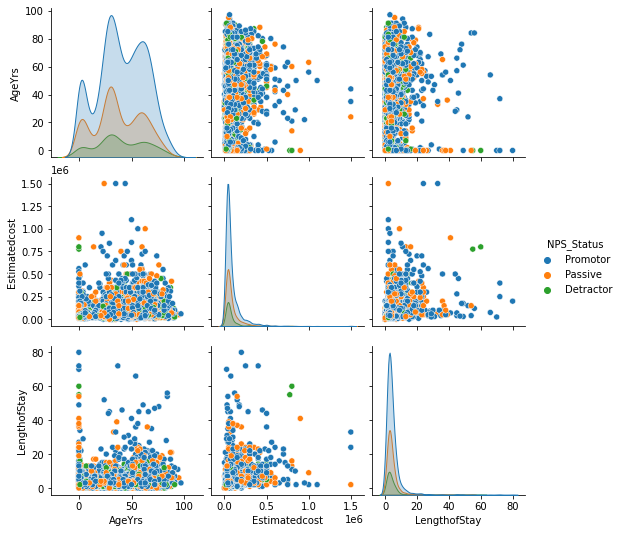

In [9]:
##Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns

numericaldata=data[['AgeYrs','Estimatedcost','LengthofStay','NPS_Status']]
sns.pairplot(numericaldata,hue='NPS_Status')


In [10]:
data.dtypes

MaritalStatus                             object
AgeYrs                                     int64
Sex                                       object
BedCategory                               object
Department                                object
Estimatedcost                              int64
InsPayorcategory                          object
State                                     object
Country                                   object
STATEZONE                                 object
CE_ACCESSIBILITY                          object
CE_CSAT                                   object
CE_VALUEFORMONEY                          object
EM_IMMEDIATEATTENTION                     object
EM_NURSING                                object
EM_DOCTOR                                 object
EM_OVERALL                                object
AD_TIME                                   object
AD_TARRIFFPACKAGESEXPLAINATION            object
AD_STAFFATTITUDE                          object
INR_ROOMCLEANLINESS 

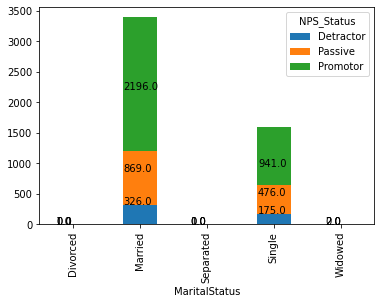

In [11]:
## Factor Vs Factor Marital Status and NPS_Status

crosstb=pd.crosstab(data['MaritalStatus'],data['NPS_Status'])

# crosstb=pd.crosstab(data['MaritalStatus'],data['NPS_Status']).apply(lambda r: r/r.sum(), axis=1)
ax=crosstb.plot(kind='bar',stacked=True,label=True)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [12]:
##Chisquared test to check for significance
from scipy import stats 

c,p,dof,expected=stats.chi2_contingency(crosstb)
p
##Yes there is significance between Marital Status and NPS_Status

0.0011860281607372464

In [13]:
crosstb ##64% of Married people seems to like the hospital and are Promotors compared to Singles whiere 59% are promotors

NPS_Status,Detractor,Passive,Promotor
MaritalStatus,,,
Divorced,1,0,0
Married,326,869,2196
Separated,0,0,1
Single,175,476,941
Widowed,0,2,2


In [14]:

count=0
a=[]
for i in ls:
  
  crosstb=pd.crosstab(data[i],data['NPS_Status'])
  c,p,dof,expected = stats.chi2_contingency(crosstb)

  if p <  0.05:
    count+=1
    print('{}Yes! This variable {} has significance with 95% conf with p-value as {} '.format(count,i,p))
  else:
    a.append(i)
##Seems like 45 variables out of 47 have significance at 90% confidence 
##Will perform EDA and Bi-Variate Analysis

1Yes! This variable MaritalStatus has significance with 95% conf with p-value as 0.0011860281607372464 
2Yes! This variable Sex has significance with 95% conf with p-value as 0.026911887890060066 
3Yes! This variable BedCategory has significance with 95% conf with p-value as 1.3572007100465888e-08 
4Yes! This variable Department has significance with 95% conf with p-value as 4.531334897059869e-07 
5Yes! This variable InsPayorcategory has significance with 95% conf with p-value as 4.076085776662428e-13 
6Yes! This variable State has significance with 95% conf with p-value as 8.179670103489967e-05 
7Yes! This variable Country has significance with 95% conf with p-value as 0.02084693233898609 
8Yes! This variable STATEZONE has significance with 95% conf with p-value as 6.226207775935155e-07 
9Yes! This variable CE_ACCESSIBILITY has significance with 95% conf with p-value as 8.531344167530348e-181 
10Yes! This variable CE_CSAT has significance with 95% conf with p-value as 0.0 
11Yes! This

In [15]:
count=0
b=[]
for i in numlist:
  
  Promotor=data[i][data['NPS_Status']=='Promotor']
  Passive=data[i][data['NPS_Status']=='Passive']
  Detractor=data[i][data['NPS_Status']=='Detractor']
  p_value=stats.f_oneway(Promotor,Passive,Detractor)
  print(p_value,i)
##Seems like all the int variables are significant based on ANOVA  

F_onewayResult(statistic=9.934319804713269, pvalue=4.944850823584424e-05) AgeYrs
F_onewayResult(statistic=3.623065193319743, pvalue=0.0267710272383185) Estimatedcost
F_onewayResult(statistic=3.9483229407524707, pvalue=0.019347353619054385) LengthofStay
F_onewayResult(statistic=10969.497611099176, pvalue=0.0) CE_NPS


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


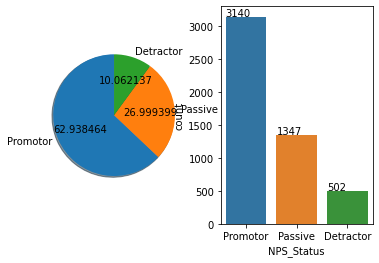

In [16]:
##Target Value Distribution

plt.figure()
plt.subplot(1,2,1)
plt.pie(data['NPS_Status'].value_counts(),autopct='%3f',startangle=90,labels=['Promotor','Passive','Detractor'],shadow=True)


plt.subplot(1,2,2)
cv=sns.countplot(data['NPS_Status'])
for p in cv.patches:
    cv.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# # plt.subplot(data['NPS_Status'])
# plt.pie(data['NPS_Status'].value_counts(),autopct='%3f',startangle=90,labels=['Promotor','Passive','Detractor'],shadow=True)
# sns.countplot(x=data['NPS_Status'],ax=1)

# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
# axes[0].plt.pie(data['NPS_Status'].value_counts(),autopct='%3f',startangle=90,labels=['Promotor','Passive','Detractor'],shadow=True)
# axes[1].plt.pie(data['NPS_Status'].value_counts(),autopct='%3f',startangle=90,labels=['Promotor','Passive','Detractor'],shadow=True)
# fig.tight_layout()

# fig, ax =plt.subplots(1,2)
# sns.countplot(data['NPS_Status'], ax=ax[0])
# sns.barplot(data['NPS_Status'].count(), ax=ax[1])
# fig.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


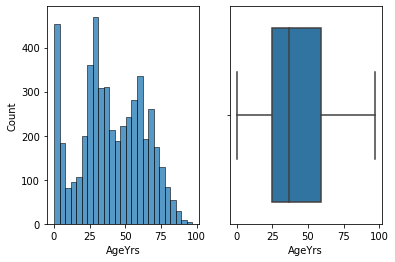

In [17]:
##Age Years and Target

plt.figure()
plt.subplot(1,2,1)
sns.histplot(data['AgeYrs'])

# plt.subplot(1,2,2)
# sns.distplot(data['AgeYrs'])

plt.subplot(1,2,2)
sns.boxplot(data['AgeYrs'])

In [18]:
import plotly.graph_objs as go

fig = go.Figure()
fig.add_trace(go.Histogram(x=data['AgeYrs']))

loss_90th=data['AgeYrs'].quantile(0.90)
loss_10th=data['AgeYrs'].quantile(0.10)

fig.add_shape(
        go.layout.Shape(type='line', xref='x',
                        x0=loss_90th, y0=0,x1=loss_90th,y1=300, line=dict(
        color="black",
        width=1,
    ))
)

fig.add_shape(
        go.layout.Shape(type='line', xref='x',
                        x0=loss_10th, y0=0,x1=loss_10th,y1=300, line=dict(
        color="black",
        width=1,
    ))
)
##80 % of patients are from Age 5 to 70
##Most likely age range is between 20-40

,AgeYrs
NPS_Status,
Detractor,40.209163
Passive,37.334076
Promotor,40.594268


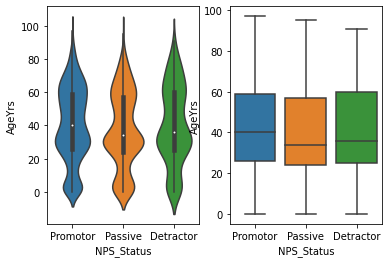

In [19]:
##Bi-Variate Age and Target
plt.figure()
plt.subplot(1,2,1)
sns.violinplot(x=data['NPS_Status'],y=data['AgeYrs'])
##There is a slight difference between Passive and the other groups whereas Promtors and Detractor dont have significance

# data['AgeYrs'][data['NPS_Status']=='Detractor'].mean()
plt.subplot(1,2,2)
sns.boxplot(x=data['NPS_Status'],y=data['AgeYrs'])
data.groupby('NPS_Status')[['AgeYrs']].mean()


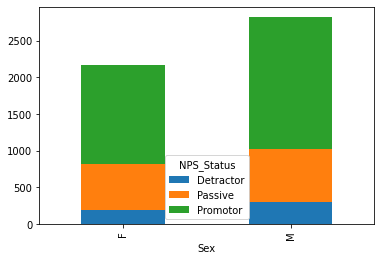

In [20]:
##Relation between SEX and Target

crstb=pd.crosstab(data['Sex'],data['NPS_Status'])
crstb.plot(kind='bar',stacked=True)

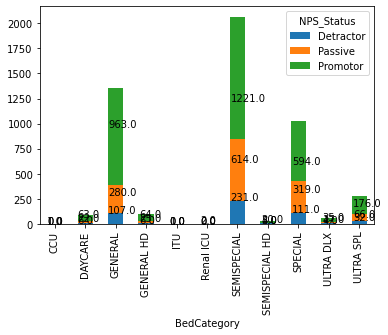

In [21]:
##EDA for Bed Category and Departments
crstb=pd.crosstab(data['BedCategory'],data['NPS_Status'])
ax=crstb.plot(kind='bar',stacked=True)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

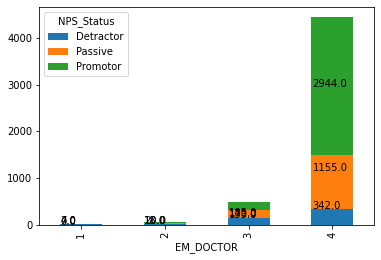

In [22]:
##EDA for Departments
crstb=pd.crosstab(data['EM_DOCTOR'],data['NPS_Status'])
ax=crstb.plot(kind='bar',stacked=True)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

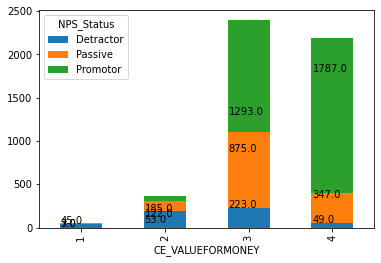

In [23]:
##EDA for Departments
crstb=pd.crosstab(data['CE_VALUEFORMONEY'],data['NPS_Status'])
ax=crstb.plot(kind='bar',stacked=True)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

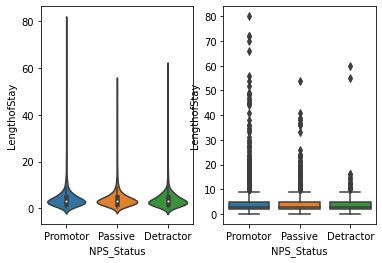

In [24]:
##Bi-Variate LengthofStay and Target
plt.figure()
plt.subplot(1,2,1)
sns.violinplot(x=data['NPS_Status'],y=data['LengthofStay'])
##There is a slight difference between Passive and the other groups whereas Promtors and Detractor dont have significance
plt.subplot(1,2,2)
sns.boxplot(x=data['NPS_Status'],y=data['LengthofStay'])

# data['AgeYrs'][data['NPS_Status']=='Detractor'].mean()
# data.groupby('NPS_Status')[['LengthofStay']].mean()


In [25]:

data['AgeYrs'].describe()

count    4989.000000
mean       39.675286
std        22.673947
min         0.000000
25%        25.000000
50%        37.000000
75%        59.000000
max        97.000000
Name: AgeYrs, dtype: float64

In [ ]:
##Normalizing the Integer variables

##We dont need Normalization for Bagging and Boosting and DT and RF whereas its needed for KNN, NN, Gradient descent usually
##G
##Age is non uniform hence performing Standardization to make it a normal distribution

from sklearn.preprocessing import MinMaxScaler


stdscaler=MinMaxScaler()
data['AgeYrs']=stdscaler.fit_transform(data[['AgeYrs']])

In [26]:
#One hot encoding for categorical variable for variables with levels <=10
# data=pd.get_dummies(data,columns=['MaritalStatus','Sex','BedCategory','Department','InsPayorcategory','STATEZONE'])
strcatlist=['MaritalStatus','Sex','BedCategory','Department','InsPayorcategory','State','Country','STATEZONE']

for i in strcatlist:
  print('No of unique values in {} are {}'.format(i,len(np.unique(data[i]))))
  if len(np.unique(data[i]))<=10:
    data=pd.get_dummies(data,columns=[i])


No of unique values in MaritalStatus are 5
No of unique values in Sex are 2
No of unique values in BedCategory are 11
No of unique values in Department are 7
No of unique values in InsPayorcategory are 5
No of unique values in State are 57
No of unique values in Country are 29
No of unique values in STATEZONE are 7


In [27]:
##One hot Encoding for Features with more than 10 levels, We just take top 10 categories
##Bed Category, State, Country
data.BedCategory.value_counts().sort_values(ascending= False).head(20)

top_10_bed=[x for x in data.BedCategory.value_counts().sort_values(ascending= False).head(10).index ]
top_10_bed

['SEMISPECIAL',
 'GENERAL',
 'SPECIAL',
 'ULTRA SPL',
 'GENERAL HD',
 'DAYCARE',
 'ULTRA DLX',
 'SEMISPECIAL HD',
 'Renal ICU',
 'ITU']

In [28]:
for label in top_10_bed:
  data[label]=np.where(data['BedCategory']==label,1,0)

In [29]:
##Function for One Hot Encoding
def one_hot_encode(df,variable,top_10):
  for label in top_10:
    data[label]=np.where(data[variable]==label,1,0)


In [30]:
##one hot Encoding for State
top_10=[x for x in data.State.value_counts().sort_values(ascending=False).head(10).index]
one_hot_encode(data,'State',top_10)

In [31]:
##one hot Encoding for Country
top_10=[x for x in data.Country.value_counts().sort_values(ascending=False).head(10).index]
one_hot_encode(data,'Country',top_10)

In [32]:
##Dropping original variables after creating dummy variables
data=data.drop(labels=['State','Country','BedCategory'],axis=1)

In [33]:
##Checkging for Multicollinearity
##I can also use Corr Plot to see collinearity
##For Multicollinearity if small set of features -> VIF else if more no of features -> Ridge or Lasso
##VIF starts from 1 -> Infinity
from statsmodels.stats.outliers_influence import variance_inflation_factor

##Independent int variables
X=data[['AgeYrs','Estimatedcost','LengthofStay']]

##VIF Dataframe
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 

##Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

##Seems like no strong Multicollinearity

X.corr()

         feature       VIF
0         AgeYrs  1.766420
1  Estimatedcost  1.791102
2   LengthofStay  1.753535


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



,AgeYrs,Estimatedcost,LengthofStay
AgeYrs,1.000000,0.114673,0.043928
Estimatedcost,0.114673,1.000000,0.302158
LengthofStay,0.043928,0.302158,1.000000


In [34]:
##To Segregate Numeric and Categorical variables
ls=list(data.columns.values)

for i in ls:
  if i in numlist:
    ls.remove(i)

In [35]:
for i in ls:
  data[i]=data[i].astype('object')
data['Estimatedcost']=data['Estimatedcost'].astype('int')
data['LengthofStay']=data['LengthofStay'].astype('int')

In [36]:
Y=data['NPS_Status']
data=data.drop('NPS_Status',axis=1)
X=data.iloc[:,:]

In [37]:
X=X.drop(['AdmissionDate','DischargeDate','CE_NPS'],axis=1)


In [38]:
##Feature Selection Methods

##1 - > Univariate selection
## For Med - Small Datasets use Backward Elimintaion, Forward selection, Recursive feature Extraction 
##Embedded Methods - These methods randomly select all possible combinations of variables and select the best possible combination

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

ordered_rank_feature=SelectKBest(score_func=chi2)
ranks=ordered_rank_feature.fit(X,Y)



In [39]:
scores=pd.DataFrame(ranks.scores_,columns=['Scores'])
cols=pd.DataFrame(X.columns)

In [40]:
feature_rank=pd.concat([scores,cols],axis=1)
feature_rank.columns=['Scores','Columns']


In [41]:
feature_rank.nlargest(50,'Scores')##Top 10 important variables

,Scores,Columns
1,905601.694937,Estimatedcost
0,256.536581,AgeYrs
4,146.962734,CE_VALUEFORMONEY
3,103.683774,CE_CSAT
34,98.200681,DP_DISCHARGETIME
22,98.124673,AE_ATTENDEEFOOD
36,83.706629,DP_DISCHARGEPROCESS
16,79.178343,FNB_FOODQUALITY
17,77.517693,FNB_FOODDELIVERYTIME
10,75.454666,AD_TARRIFFPACKAGESEXPLAINATION


In [42]:
##feature Importance using Ensemble Extra tree CLassifier

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model=ExtraTreesClassifier()
model.fit(X,Y)

print(model.feature_importances_)

[4.72009576e-02 4.37286504e-02 2.92026837e-02 4.54846492e-02
 4.54109472e-02 1.19655554e-02 1.00659591e-02 8.60358423e-03
 1.24774743e-02 1.93787216e-02 2.10002168e-02 1.47719598e-02
 1.87135519e-02 1.66427074e-02 1.64834734e-02 1.69166778e-02
 2.28579953e-02 2.03916485e-02 1.65501312e-02 1.46934134e-02
 1.49537604e-02 1.63914525e-02 2.39119933e-02 1.11592218e-02
 1.18382324e-02 1.66815198e-02 1.17636984e-02 1.09232431e-02
 8.86415981e-03 1.12412857e-02 9.26439595e-03 9.98326377e-03
 1.33135072e-02 1.20409526e-02 2.19433728e-02 1.83532814e-02
 2.05720178e-02 4.07299342e-02 4.16221494e-05 1.03122484e-02
 9.38743259e-06 1.05311560e-02 1.59474997e-04 1.52217615e-02
 1.48989465e-02 6.56321543e-03 1.66123810e-02 6.83669225e-03
 7.19722791e-03 8.38358145e-03 4.54046158e-03 1.12224518e-02
 7.89311258e-03 7.05676101e-03 1.51993429e-02 1.63070058e-03
 1.56562691e-02 3.79437530e-04 3.47340415e-03 9.91493439e-04
 1.11979474e-03 5.55183053e-03 1.65607325e-03 9.13174656e-04
 1.55897203e-02 1.566732

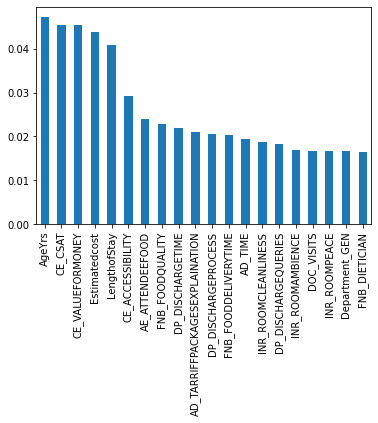

In [45]:
featr_imp_score=pd.Series(model.feature_importances_,index=X.columns)
featr_imp_score.nlargest(20).plot(kind='bar')


In [48]:
##Train Test Split 80% for Train and 20% Test

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=33 )

In [54]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(3991, 94)
(998, 94)
(3991,)
(998,)


In [56]:
##Building a Random Forest Model with all the Variables
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=10).fit(X_train,Y_train)
pred=model.predict(X_test)

In [57]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print(confusion_matrix(pred,Y_test))
print(accuracy_score(pred,Y_test))
print(classification_report(pred,Y_test))


[[ 35  20  11]
 [ 29 104  99]
 [ 33 137 530]]
0.6703406813627254
              precision    recall  f1-score   support

   Detractor       0.36      0.53      0.43        66
     Passive       0.40      0.45      0.42       232
    Promotor       0.83      0.76      0.79       700

    accuracy                           0.67       998
   macro avg       0.53      0.58      0.55       998
weighted avg       0.70      0.67      0.68       998



In [65]:
##Hyper Paramater Tuning using Randomized Search CV
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

##No of trees in your RF
n_estimators=[int(x) for x in np.linspace(start=200,stop=2000,num=10) ]

##Max No of Featires considered for each decision tree in RF
max_features=["auto","log2","sqrt"]

##Maximum Number of levels in trees
max_depth=[int(x) for x in np.linspace(10,1000,10)]

##Minimum samples required to split a node
min_samples_split=[2,5,10,14]


##Minimum number of samples required at each leaf node
min_samples_leaf=[1,2,4,6,8]

##Create the Random Grid

Random_Grid={
    
    "n_estimators":n_estimators,
    "max_features":max_features,
    "max_depth":max_depth,
    "min_samples_split":min_samples_split,
    "min_samples_leaf":min_samples_leaf,
    "criterion":["gini","entropy"]

}


In [68]:
##Building the RF model using the created parameter

rf=RandomForestClassifier()

rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=Random_Grid
                               ,n_iter=100,cv=3,verbose=2,n_jobs=-1,random_state=100)

##Fit the Randomized model
rf_randomcv.fit(X_train,Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.1min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 18.4min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [69]:
rf_randomcv.best_params_

{'criterion': 'gini',
 'max_depth': 340,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [70]:
best_estimator_grid=rf_randomcv.best_estimator_

In [72]:
y_pred=best_estimator_grid.predict(X_test)
print(confusion_matrix(y_pred,Y_test))
print(accuracy_score(y_pred,Y_test))
print(classification_report(y_pred,Y_test))

[[ 36  11   2]
 [ 28  88  49]
 [ 33 162 589]]
0.7144288577154309
              precision    recall  f1-score   support

   Detractor       0.37      0.73      0.49        49
     Passive       0.34      0.53      0.41       165
    Promotor       0.92      0.75      0.83       784

    accuracy                           0.71       998
   macro avg       0.54      0.67      0.58       998
weighted avg       0.80      0.71      0.74       998



In [46]:

##Dummies for Categorical Variables -- Done
##VIF and Step Wise Regression -- Done
##Normalizing the integer variables -- Done
##Sampling if sensitivity, specificity is less than desired
##Modelling
data.corr()

,AgeYrs,Estimatedcost,LengthofStay
AgeYrs,1.000000,0.114673,0.043928
Estimatedcost,0.114673,1.000000,0.302158
LengthofStay,0.043928,0.302158,1.000000
